In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

health = pd.read_csv('Mental health Depression disorder Data.csv')

C:\Users\bekym\AppData\Local\Temp\ipykernel_17096\300513165.py:8: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  health = pd.read_csv('Mental health Depression disorder Data.csv')


In [11]:
health['Entity'].loc[health['Code'].isnull()].unique()

array(['Andean Latin America', 'Australasia', 'Caribbean', 'Central Asia',
       'Central Europe',
       'Central Europe, Eastern Europe, and Central Asia',
       'Central Latin America', 'Central Sub-Saharan Africa', 'East Asia',
       'Eastern Europe', 'Eastern Sub-Saharan Africa', 'England',
       'High SDI', 'High-income', 'High-income Asia Pacific',
       'High-middle SDI', 'Latin America and Caribbean', 'Low SDI',
       'Low-middle SDI', 'Middle SDI', 'North Africa and Middle East',
       'North America', 'Northern Ireland', 'Oceania', 'Scotland',
       'South Asia', 'Southeast Asia',
       'Southeast Asia, East Asia, and Oceania', 'Southern Latin America',
       'Southern Sub-Saharan Africa', 'Sub-Saharan Africa',
       'Tropical Latin America', 'Wales', 'Western Europe',
       'Western Sub-Saharan Africa', 'Africa', 'Asia', 'Europe',
       'Latin America', 'Saint Barthlemy'], dtype=object)

In [12]:
health.dropna(axis=0, inplace = True)

In [13]:
health.head()

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260


In [3]:
developed = health.loc[health['Entity'].isin(['United States','Japan','Argentina','Australia','United Kingdom', 'South Korea','Denmark','Canada','France','Taiwan','Uruguay','Germany'])]

developed = developed.reset_index(drop=True)

developed = developed.drop('index', axis=1)

developed.head()

developed["Universal Care"] = np.nan

developed.head()


,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Universal Care
0,Argentina,ARG,1990,0.194422,0.755674,0.323686,6.165921,0.919424,3.569180,1.918939,NaN
1,Argentina,ARG,1991,0.194184,0.756386,0.326904,6.174471,0.920323,3.579068,2.022040,NaN
2,Argentina,ARG,1992,0.194034,0.757139,0.330504,6.182707,0.921296,3.588855,2.116047,NaN
3,Argentina,ARG,1993,0.193973,0.757909,0.334286,6.190356,0.921620,3.597366,2.193307,NaN
4,Argentina,ARG,1994,0.194004,0.758686,0.338418,6.197271,0.921581,3.606913,2.246206,NaN


In [98]:
map_names = {'Entity': 'country',
             'Year' : 'year',
             'Schizophrenia (%)':'schizo', 
             'Bipolar disorder (%)':'bipolar',
             'Eating disorders (%)' : 'eating_dis',
             'Anxiety disorders (%)' : 'anxiety',
             'Drug use disorders (%)':'drug',
             'Depression (%)':'depres',
             'Alcohol use disorders (%)':'alcohol'}

developed.rename(columns=map_names,inplace=True)

In [102]:
developed

,country,Code,year,schizo,bipolar,eating_dis,anxiety,drug,depres,alcohol,Universal Care
0,Argentina,ARG,1990,0.194422,0.755674,0.323686,6.165921,0.919424,3.569180,1.918939,NaN
1,Argentina,ARG,1991,0.194184,0.756386,0.326904,6.174471,0.920323,3.579068,2.022040,NaN
2,Argentina,ARG,1992,0.194034,0.757139,0.330504,6.182707,0.921296,3.588855,2.116047,NaN
3,Argentina,ARG,1993,0.193973,0.757909,0.334286,6.190356,0.921620,3.597366,2.193307,NaN
4,Argentina,ARG,1994,0.194004,0.758686,0.338418,6.197271,0.921581,3.606913,2.246206,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5947,Uruguay,URY,2013,121013.371501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5948,Uruguay,URY,2014,121976.987422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5949,Uruguay,URY,2015,122948.157402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5950,Uruguay,URY,2016,123877.363598,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
developed_clean = developed.dropna(axis='rows')
developed_clean

,country,Code,year,schizo,bipolar,eating_dis,anxiety,drug,depres,alcohol,Universal Care


In [106]:
anxiety_dirty = developed[['country','anxiety', 'year']]
anxiety_dirty

,country,anxiety,year
0,Argentina,6.165921,1990
1,Argentina,6.174471,1991
2,Argentina,6.182707,1992
3,Argentina,6.190356,1993
4,Argentina,6.197271,1994
...,...,...,...
5947,Uruguay,NaN,2013
5948,Uruguay,NaN,2014
5949,Uruguay,NaN,2015
5950,Uruguay,NaN,2016


In [107]:
anxiety = anxiety_dirty.dropna(axis='rows')
anxiety

,country,anxiety,year
0,Argentina,6.165921,1990
1,Argentina,6.174471,1991
2,Argentina,6.182707,1992
3,Argentina,6.190356,1993
4,Argentina,6.197271,1994
...,...,...,...
331,Uruguay,6.300966,2013
332,Uruguay,6.305186,2014
333,Uruguay,6.309360,2015
334,Uruguay,6.313555,2016


In [108]:
anxiety.describe()

,anxiety
count,336.000000
mean,5.418840
std,1.241408
min,3.376177
25%,4.392546
50%,5.857797
75%,6.574948
max,6.971995


In [55]:
## I want to find the mean per country starting in 1990 
argentina = anxiety.loc[anxiety.Entity== 'Argentina']
uruguay = anxiety.loc[anxiety.Entity== 'Uruguay']
usa = anxiety.loc[anxiety.Entity== 'United States']
japan = anxiety.loc[anxiety.Entity== 'Japan']
australia = anxiety.loc[anxiety.Entity== 'Australia']
uk = anxiety.loc[anxiety.Entity== 'United Kingdom']
south_korea = anxiety.loc[anxiety.Entity== 'South Korea']
denmark = anxiety.loc[anxiety.Entity== 'Denmark']
canada = anxiety.loc[anxiety.Entity== 'Canada']
france = anxiety.loc[anxiety.Entity== 'France']
taiwan = anxiety.loc[anxiety.Entity== 'Taiwan']
germany = anxiety.loc[anxiety.Entity== 'Germany']

In [58]:
## mean of the country 
a = argentina.loc[:, 'Anxiety disorders (%)'].mean()

6.237986392857143

In [59]:
b = uruguay.loc[:, 'Anxiety disorders (%)'].mean()

6.265410464285713

In [60]:
c = usa.loc[:, 'Anxiety disorders (%)'].mean()

6.741583785714285

In [61]:
d = japan.loc[:, 'Anxiety disorders (%)'].mean()

3.538699357142857

In [62]:
e = australia.loc[:, 'Anxiety disorders (%)'].mean()

6.550010357142857

In [63]:
f = uk.loc[:, 'Anxiety disorders (%)'].mean()

4.633038464285714

In [64]:
g = south_korea.loc[:, 'Anxiety disorders (%)'].mean()

3.786406571428571

In [65]:
h = denmark.loc[:, 'Anxiety disorders (%)'].mean()

5.313583892857144

In [66]:
i = canada.loc[:, 'Anxiety disorders (%)'].mean()

5.213987357142856

In [67]:
j = france.loc[:, 'Anxiety disorders (%)'].mean()

6.686942392857145

In [68]:
k = taiwan.loc[:, 'Anxiety disorders (%)'].mean()

3.425401214285714

In [69]:
l = germany.loc[:, 'Anxiety disorders (%)'].mean()

6.633030214285715

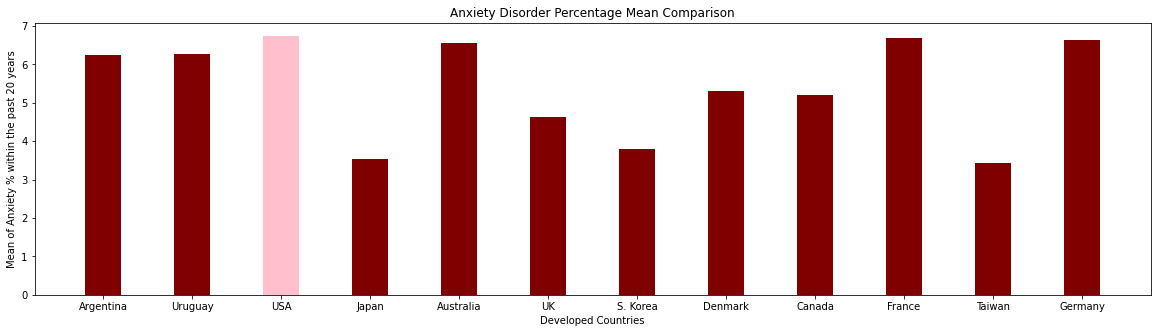

In [88]:
## Visualize mean per countries 
data = {'Argentina':6.237986392857143, 'Uruguay':6.265410464285713, 'USA':6.741583785714285,
        'Japan':3.538699357142857, 'Australia':6.550010357142857, 'UK':4.633038464285714,
        'S. Korea':3.786406571428571,'Denmark':5.313583892857144,'Canada':5.213987357142856,
        'France':6.686942392857145,'Taiwan':3.425401214285714,'Germany':6.633030214285715}
country = list(data.keys())
mean = list(data.values())
  
fig = plt.figure(figsize = (20, 5))
c = ['maroon', 'maroon', 'pink', 'maroon', 'maroon','maroon','maroon','maroon', 'maroon', 'maroon', 'maroon','maroon']
# creating the bar plot
plt.bar(country, mean, color = c,
        width = 0.4)

plt.xlabel("Developed Countries")
plt.ylabel("Mean of Anxiety % within the past 20 years")
plt.title("Anxiety Disorder Percentage Mean Comparison")
plt.show()


In [103]:
## Run one of these bad boys on anxiety disorder based on country 
ols_object = smf.ols(formula = 'anxiety~drug+alcohol', data = developed)
model = ols_object.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                anxiety   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     29.61
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           1.46e-12
Time:                        19:23:21   Log-Likelihood:                -521.42
No. Observations:                 336   AIC:                             1049.
Df Residuals:                     333   BIC:                             1060.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9281      0.253     15.552      0.000       3.431       4.425
drug           0.6206      0.093      6.653      0.000       0.437       0.804
alcohol        0.4024      0.140      2.876      0.004       0.127       0.678
==============================================================================
Omnibus:                     5137.737   Durbin-Watson:                   0.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.404
Skew:                          -0.154   Prob(JB):                     1.52e-07
Kurtosis:                       1.534   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""